# Image compression with clustering in kmeans_clusterer

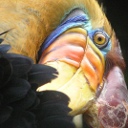

In [7]:
require 'kmeans-clusterer'
require 'chunky_png'
File.open '../datasets/images/bird_small.png'

In [8]:
image = ChunkyPNG::Image.from_file('../datasets/images/bird_small.png')
pixels = []
(0..image.height-1).each do |i|
  (0..image.width-1).each do |j|
    pixels[i] = [] unless pixels[i]
    pixels[i] << ChunkyPNG::Color.to_truecolor_bytes(image.get_pixel(i, j))
  end
end
kmeans = KMeansClusterer.run 16, pixels.flatten(1)

#<KMeansClusterer k:16 iterations:58 error:7653485.074133564 runtime:0.530389844>

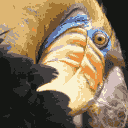

In [9]:
output = ChunkyPNG::Image.new(image.height, image.width)
pixels.each_with_index do |line, i|
  line.each_with_index do |cell, j|
    predicted = kmeans.clusters.find{ |c| c.id == kmeans.predict([cell]).first }.centroid.data[true].to_a
    output[i, j] =  ChunkyPNG::Color.rgb(predicted[0].to_i, predicted[1].to_i, predicted[2].to_i)
  end
end
output.save('../datasets/images/bird_small_compressed.png')